<a href="https://colab.research.google.com/github/Ganesh9014-yadav/OIBSIP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras

In [22]:
df=pd.read_csv('/content/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [23]:
df.shape

(147473, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147473 entries, 0 to 147472
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  147472 non-null  object 
 1   category    147471 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [25]:
df['category'].value_counts()

,count
category,
1.0,65239
0.0,49948
-1.0,32284


In [26]:
labels = pd.get_dummies(df.category)
labels.columns = ["negative", "neutral", "positive"]
labels.head()

,negative,neutral,positive
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


<Axes: xlabel='category', ylabel='count'>

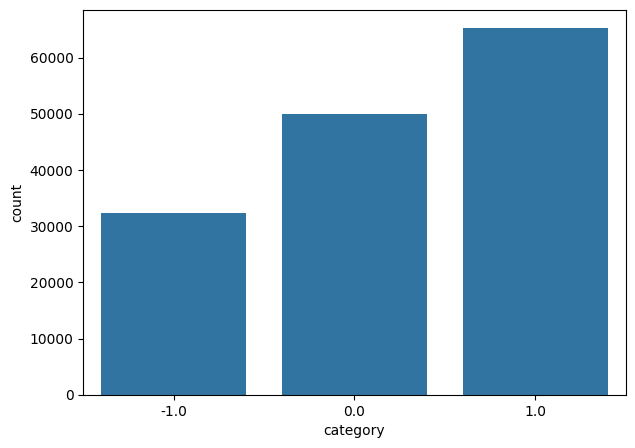

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.countplot(x="category",data=df)

Text(0.5, 1.0, 'Distribution of sentiments')

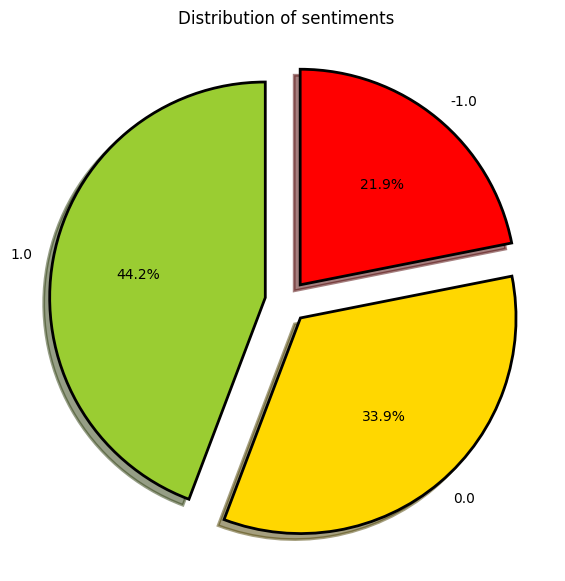

In [28]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['category'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

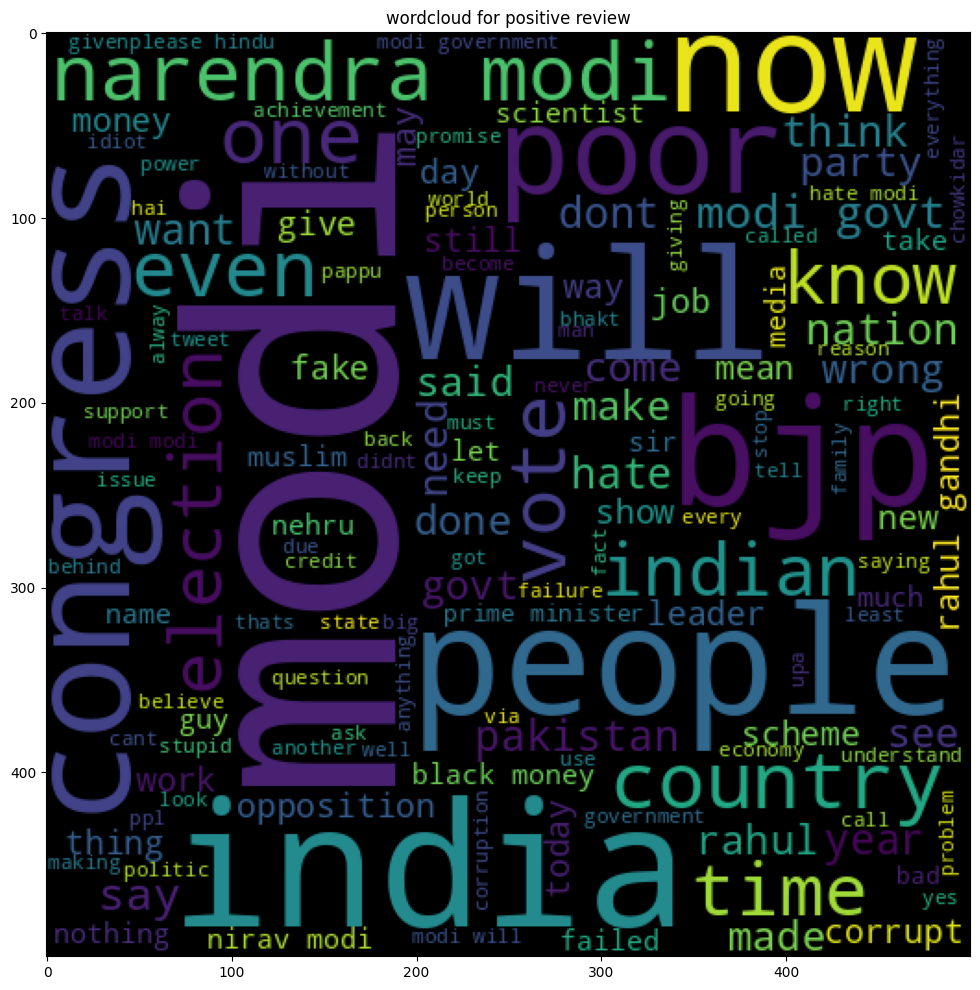

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
positive_wc = wc.generate(df[df['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(df[df['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(df[df['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.title('wordcloud for positive review')
plt.imshow(positive_wc)

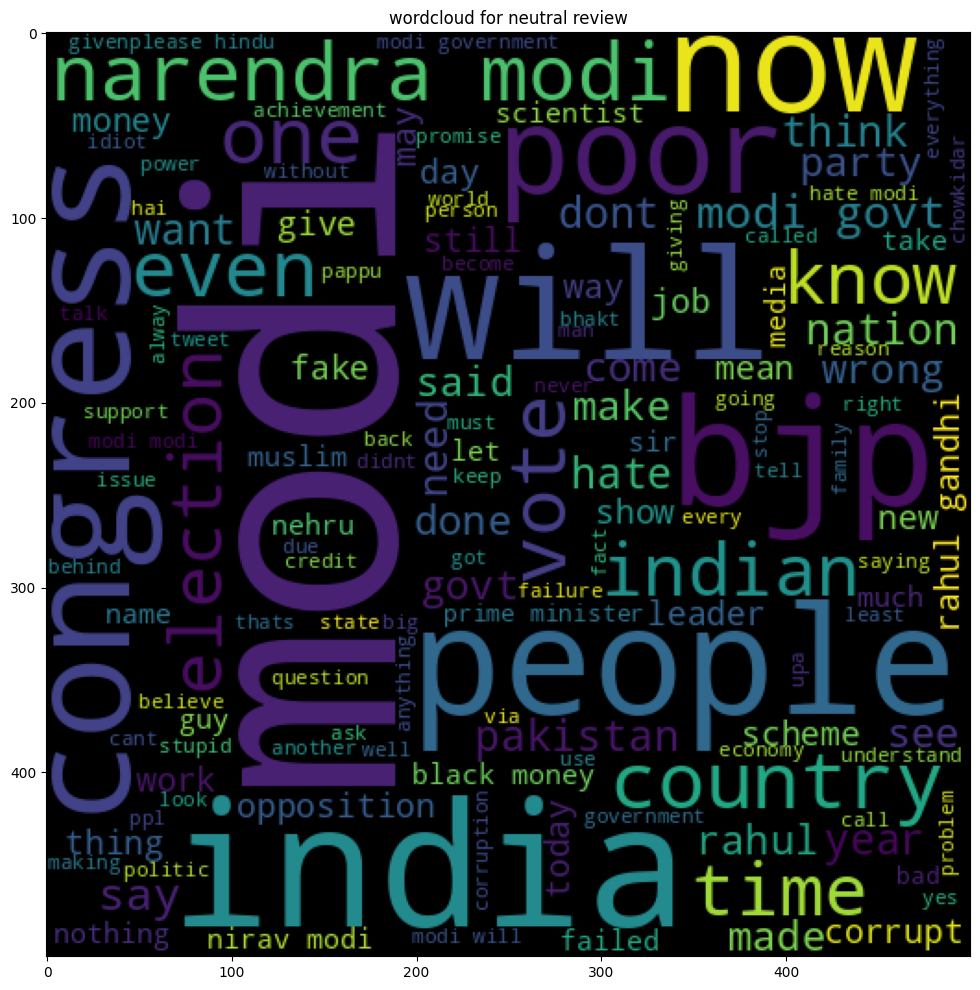

In [30]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for neutral review')
plt.imshow(neutral_wc)

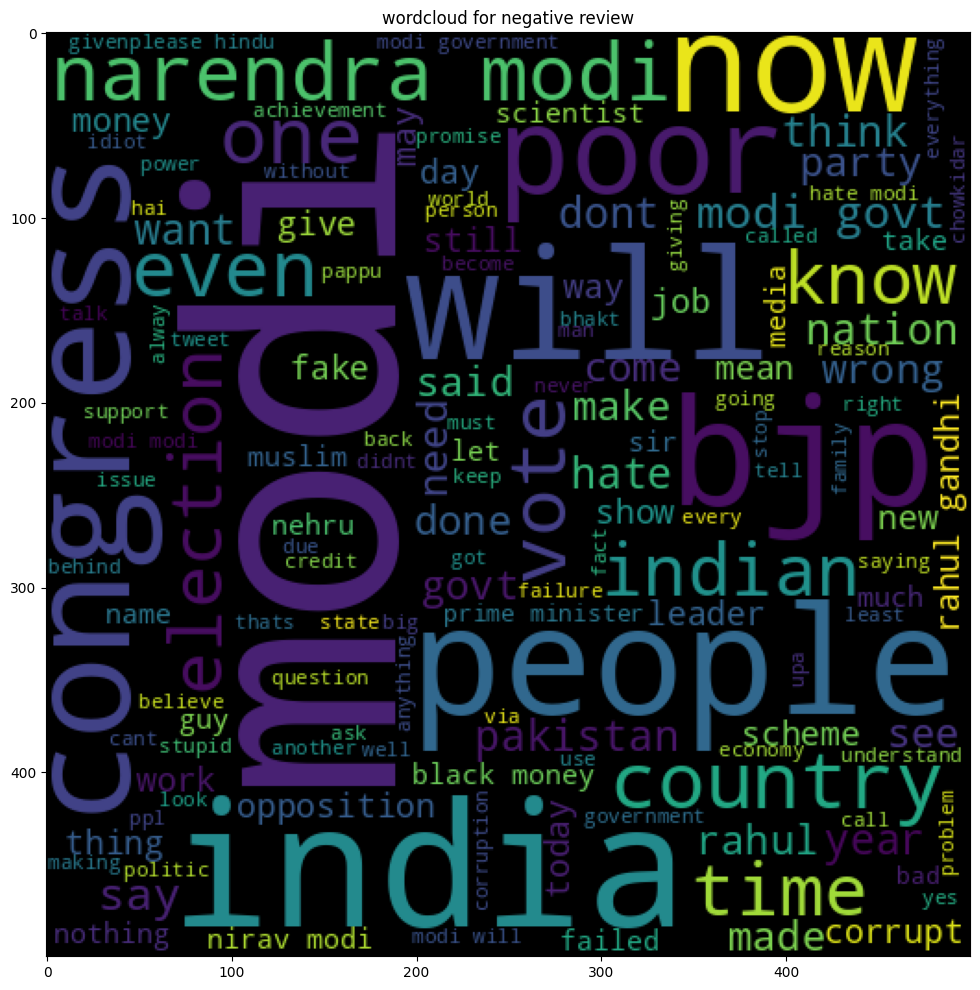

In [31]:
plt.figure(figsize = (12, 12))
plt.title('wordcloud for negative review')
plt.imshow(negative_wc)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [33]:
X = df['clean_text'].values.astype('U')
y = df['category'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [34]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True, stop_words = 'english',analyzer = 'word')), ('naive_bayes', MultinomialNB())])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

[[ 1298    41    51     0]
 [  444  5014   543     0]
 [ 7943  9929 18978     1]
 [    0     0     0     0]]
0.5716287690429909


MultinomialNB()

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences)
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_padded, labels, test_size=0.3, stratify=labels)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_padded.shape[1]),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1291/1291 [==============================] - 53s 38ms/step - loss: 0.3414 - accuracy: 0.8752 - val_loss: 0.1723 - val_accuracy: 0.9489
Epoch 2/5
1291/1291 [==============================] - 16s 12ms/step - loss: 0.1089 - accuracy: 0.9667 - val_loss: 0.1349 - val_accuracy: 0.9583
Epoch 3/5
1291/1291 [==============================] - 14s 11ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.1377 - val_accuracy: 0.9621
Epoch 4/5
1291/1291 [==============================] - 14s 11ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.1340 - val_accuracy: 0.9615
Epoch 5/5
1291/1291 [==============================] - 13s 10ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.1685 - val_accuracy: 0.9586


In [39]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1383/1383 [==============================] - 5s 4ms/step - loss: 0.1708 - accuracy: 0.9572
Test Loss: 0.1708204746246338, Test Accuracy: 0.9572352170944214


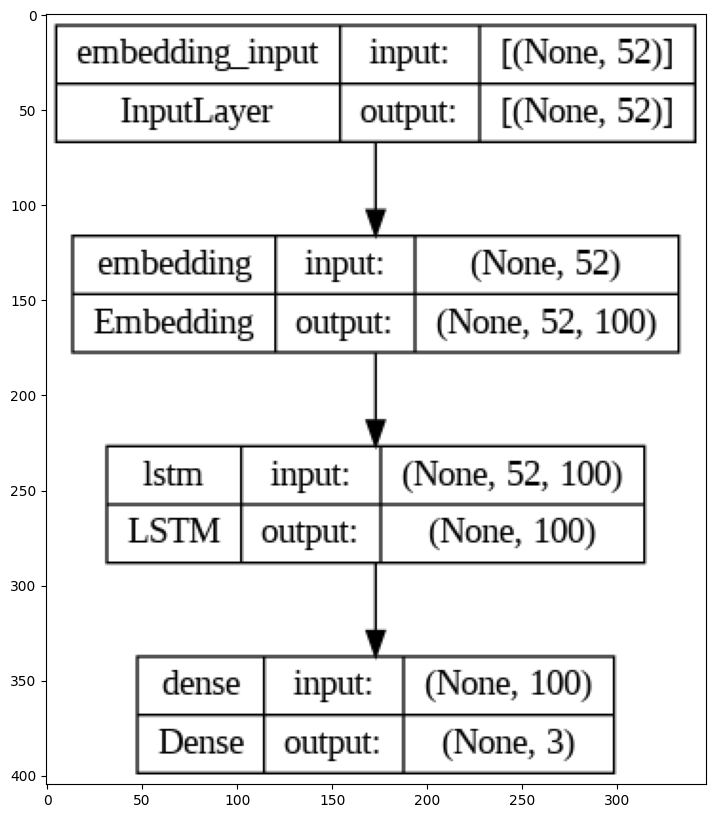

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()